# Making Words-Network

Implement social network for making graph of words connection in the Hoax corpus

In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


## Remove Stopwords

In [2]:
#removing stopwords

f1 = open('all_hoax.txt', 'r')
f2 = open('/home/adhanindita/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/lda/stopwords_id.txt', 'r')
f3 = open("all_hoax_stprmvd.txt","w")
first_words=[]
second_words=[]
for line in f1:
    words = line.split()
    for w in words:
        first_words.append(w)

for line in f2:
    w = line.split()
    for i in w:
        second_words.append(i)


for word1 in first_words :
    for word2 in second_words:
        if word1 == word2:
            while True:
                try:
                    first_words.remove(word2)
                except:
                    break
            

for word in first_words:
    f3.write(word)
    f3.write(' ')

f1.close()
f2.close()
f3.close()

  

## Remove symbol

In [3]:
import re
string = open('all_hoax_stprmvd.txt').read()
new_str = re.sub('[^a-zA-Z\n]', ' ', string)
open('all_hoax_nosym.txt', 'w').write(new_str)

35566

## Add Edges to network

In [4]:
berita = open("all_hoax_nosym.txt","r").read()

words = berita.split()
i = 0
for idx in range(1, len(words)):
    #print(words[idx-1], words[idx])
    G.add_edge(words[idx-1], words[idx])
    i += 1
print(i)


4801


In [5]:
len(G.edges())

4149

## Draw Graph

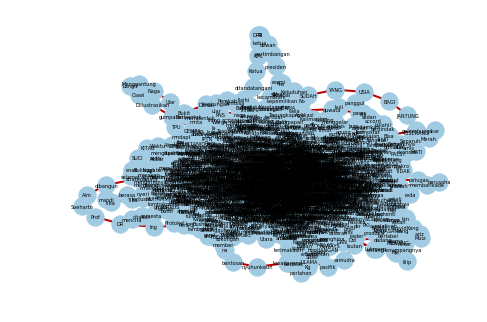

In [6]:
labels = {}

for idx in range(len(words)):
    labels[idx] = words[idx]
    
pos = nx.spring_layout(G)
nx.draw(G,pos,node_color='#A0CBE2',font_size = 5, scale=3, edge_color='#BB0000', width=2, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig("graph.png", dpi=1000)
#nx.draw_networkx_nodes(G, pos)
#nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos)
#nx.draw(G, with_labels=True, node_size=5, font_size=5, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
#plt.show()

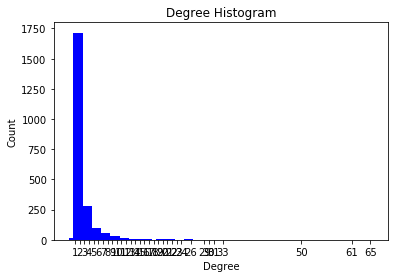

In [7]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=2, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
#nx.draw_networkx_nodes(G, pos, node_size=20)
#nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [8]:
G.edges()

EdgeView([('Terungkapnya', 'jaringan'), ('jaringan', 'Saracen'), ('jaringan', 'terlibat'), ('Saracen', 'pemberitaan'), ('Saracen', 'Foto'), ('Saracen', 'anggota'), ('Saracen', 'Lebih'), ('Saracen', 'sindikat'), ('Saracen', 'Isu'), ('pemberitaan', 'menyedot'), ('pemberitaan', 'tengah'), ('pemberitaan', 'penyelidikan'), ('menyedot', 'perhatian'), ('perhatian', 'pihak'), ('perhatian', 'telantar'), ('perhatian', 'warga'), ('perhatian', 'Mohon'), ('perhatian', 'utk'), ('pihak', 'Di'), ('Di', 'tengah'), ('Di', 'Suhu'), ('Di', 'Kuwait'), ('Di', 'ini'), ('Di', 'pesan'), ('Di', 'peristiwanya'), ('Di', 'warga'), ('Di', 'makam'), ('Di', 'pelanggannya'), ('Di', 'Indonesia'), ('Di', 'budaya'), ('Di', 'sini'), ('Di', 'xxx'), ('Di', 'ponpes'), ('tengah', 'tengah'), ('penyelidikan', 'polisi'), ('polisi', 'sindikat'), ('polisi', 'ditangkap'), ('polisi', 'terkait'), ('polisi', 'kantor'), ('polisi', 'Mabes'), ('sindikat', 'ini'), ('sindikat', 'terkait'), ('ini', 'beredar'), ('ini', 'kebencian'), ('ini', 

In [9]:
len(G.nodes())

2470

In [10]:
sorted(G.degree(), key = lambda x: int(x[1]), reverse = True)

[('pesan', 65),
 ('orang', 61),
 ('ini', 50),
 ('anak', 33),
 ('malam', 33),
 ('Dan', 31),
 ('hati', 30),
 ('tersebut', 29),
 ('warga', 29),
 ('jam', 26),
 ('teman', 26),
 ('Jakarta', 26),
 ('d', 26),
 ('motor', 24),
 ('pagi', 23),
 ('beredar', 22),
 ('berita', 22),
 ('tdk', 22),
 ('Jl', 22),
 ('Facebook', 21),
 ('Indonesia', 21),
 ('kontak', 21),
 ('nya', 20),
 ('video', 20),
 ('darah', 20),
 ('makan', 20),
 ('Anda', 20),
 ('CCTV', 20),
 ('anda', 19),
 ('cepat', 18),
 ('online', 18),
 ('Yg', 17),
 ('pengguna', 17),
 ('Pesan', 17),
 ('jalan', 17),
 ('meninggal', 17),
 ('manusia', 17),
 ('Israel', 17),
 ('dgn', 16),
 ('dn', 16),
 ('daging', 16),
 ('Di', 15),
 ('informasi', 15),
 ('Dia', 15),
 ('Berikut', 15),
 ('lain', 15),
 ('keluarga', 15),
 ('makam', 15),
 ('McD', 15),
 ('kali', 14),
 ('itu', 14),
 ('Karena', 14),
 ('BBM', 14),
 ('Dalam', 13),
 ('makanan', 13),
 ('hidup', 13),
 ('Ini', 13),
 ('broadcast', 13),
 ('air', 13),
 ('Presiden', 13),
 ('Bagi', 13),
 ('Ada', 12),
 ('memiliki'

## Degree Centrality

In [11]:
from operator import itemgetter
#degree centrality
deg_cen = nx.degree_centrality(G)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_degcen = sorted(deg_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree centrality:")
for b in sorted_degcen[:20]:
    print(b)

Top 20 nodes by degree centrality:
('pesan', 0.026326447954637507)
('orang', 0.024706358849736737)
('ini', 0.02025111381125962)
('anak', 0.013365735115431349)
('malam', 0.013365735115431349)
('Dan', 0.012555690562980965)
('hati', 0.012150668286755772)
('tersebut', 0.01174564601053058)
('warga', 0.01174564601053058)
('jam', 0.010530579181855003)
('teman', 0.010530579181855003)
('Jakarta', 0.010530579181855003)
('d', 0.010530579181855003)
('motor', 0.009720534629404618)
('pagi', 0.009315512353179425)
('beredar', 0.008910490076954233)
('berita', 0.008910490076954233)
('tdk', 0.008910490076954233)
('Jl', 0.008910490076954233)
('Facebook', 0.008505467800729041)


## Betweenness Centrality 

In [14]:
#betweenness centrality
bet_cen = nx.betweenness_centrality(G)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_betcen = sorted(bet_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betcen[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('orang', 0.17897317836041865)
('pesan', 0.1321096965425678)
('ini', 0.09671065261580737)
('tersebut', 0.0593228894892556)
('malam', 0.05479208806587564)
('anak', 0.053122116322421156)
('hati', 0.04907154785603189)
('motor', 0.04771701902704447)
('Jakarta', 0.04602464980889118)
('berita', 0.045746022929331)
('Dan', 0.041699326733067456)
('teman', 0.040874241743787544)
('Indonesia', 0.039518231972245424)
('jam', 0.038920859612713556)
('Di', 0.035882835150702785)
('warga', 0.03179829509357915)
('Israel', 0.03149723590689431)
('makan', 0.030399003753575432)
('tdk', 0.0295219059567766)
('meninggal', 0.02946545815076132)


## Closeness Centrality

In [15]:
#closeness centrality
clo_cen = nx.closeness_centrality(G)

#nx.set_node_attributes(G, 'degree', deg_cen)

sorted_clocen = sorted(clo_cen.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by closeness centrality:")
for b in sorted_clocen[:20]:
    print(b)

Top 20 nodes by closeness centrality:
('orang', 0.2794567062818336)
('pesan', 0.2769489624228828)
('ini', 0.26366937206322083)
('berita', 0.2567328688780285)
('tersebut', 0.2547724693014137)
('teman', 0.24869057211925866)
('motor', 0.24851534977352793)
('Dalam', 0.24826546003016592)
('anak', 0.24759326113116728)
('kontak', 0.2475684347738895)
('hari', 0.2454762378206403)
('Karena', 0.2452567795768352)
('Jakarta', 0.2446734714101675)
('beredar', 0.24447965145063869)
('malam', 0.24308358767352564)
('Di', 0.24289227742252828)
('Beritahu', 0.2404323692667251)
('meninggal', 0.240245207745451)
('Ada', 0.24022183304144776)
('lain', 0.23996501117698513)
